# Milestones 1 Phase 2
Nama : William

Batch : RMT-020

Dataset : [Churn Customer](https://github.com/H8-Assignments-Bay/p2-ftds020-rmt-ml1-William14045/blob/main/churn.csv)

Objective : Membuat sebuah Model Artificial Neural Network untuk Sebuah perusahaan yang ingin meminimalisir resiko seorang customer untuk berhenti memakai produk yang mereka tawarkan dengan cara memprediksi customer yang akan berhenti (churn) 

# Import Libraries

In [1]:
# Load Library yang akan digunakan
import pandas as pd
import pingouin as pg
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import tensorflow as tf
import pydot
import graphviz
import pickle

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OrdinalEncoder , MinMaxScaler
from feature_engine.outliers import Winsorizer
from tensorflow.keras.layers import Input, concatenate, Dense
from tensorflow.keras import Model
from sklearn.metrics import classification_report, confusion_matrix

# Data Loading

In [2]:
# Load Data
df = pd.read_csv('churn.csv')
pd.set_option('display.max_columns',None)
df

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

# Exploratory data analysis ( EDA )

<Axes: xlabel='membership_category', ylabel='count'>

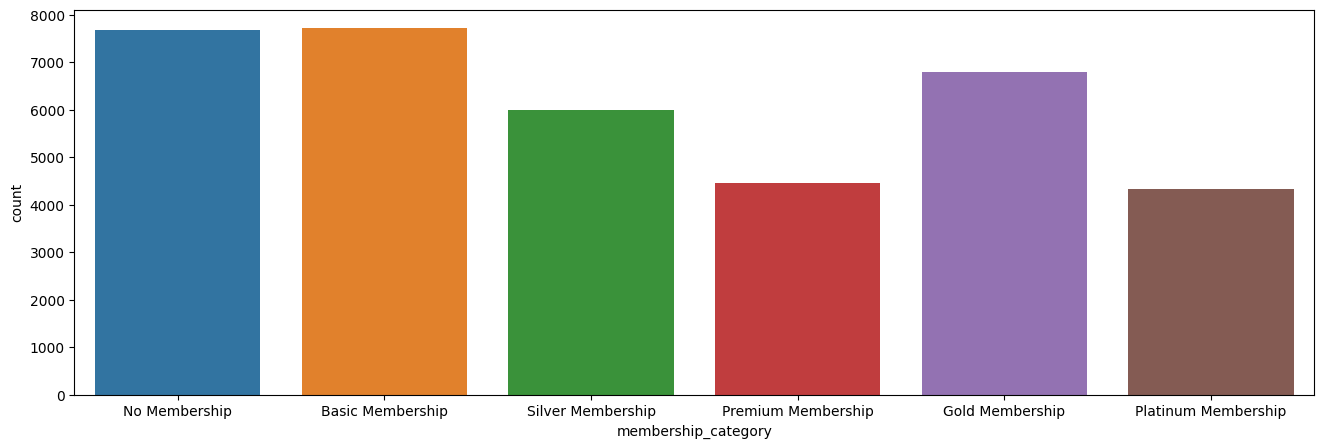

In [23]:
plt.figure(figsize=(16,5))
sns.countplot(data=df,x='membership_category') # Plotting membership category

In [4]:
df['membership_category'].value_counts()

membership_category
Basic Membership       7727
No Membership          7693
Gold Membership        6799
Silver Membership      5991
Premium Membership     4458
Platinum Membership    4342
Name: count, dtype: int64

sebagian besar customer dari perusahaan sudah memiliki membership walaupun ada 7693  orang yang tidak memiliki membership

<Axes: xlabel='feedback', ylabel='count'>

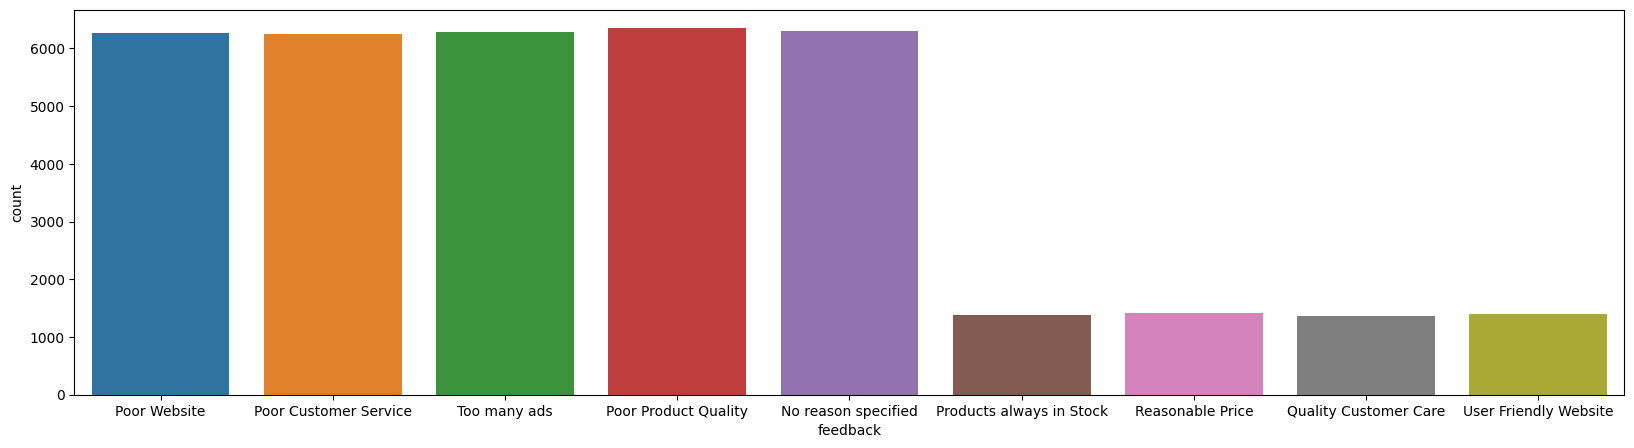

In [5]:
plt.figure(figsize=(20,5))
sns.countplot(data=df,x='feedback')

lebih banyak feedback negatif yang diterima oleh perusahaan daripada feedback positif nya

<Axes: xlabel='gender', ylabel='count'>

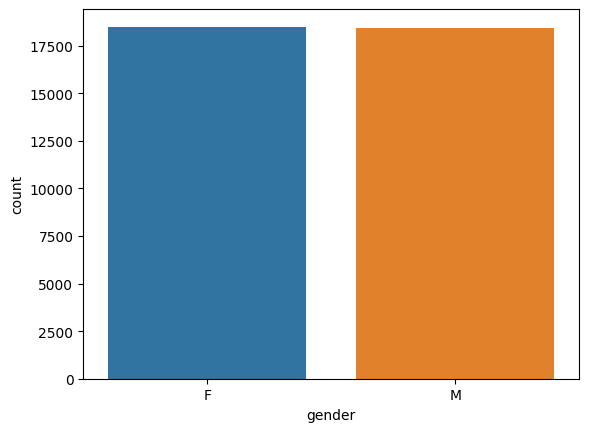

In [21]:
sns.countplot(df,x='gender')

sedangkan jika dilihat dari gender nya, tidak terlalu banyak perbedaan jumlah antara pria dan wanita

<Axes: xlabel='complaint_status', ylabel='count'>

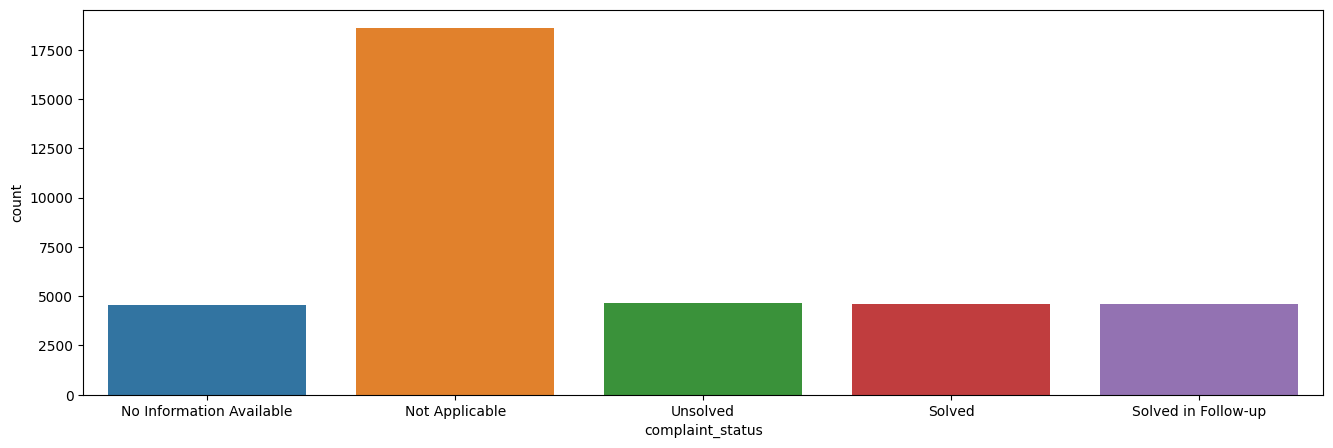

In [22]:
plt.figure(figsize=(16,5))
sns.countplot(data=df,x='complaint_status')

sebagian besar dari komplain berstatus not applicable yang artinya komplain dari customer tidak dapat diterapkan pada perusahaan

# Feature Engineering

sebelum masuk ke tahap feature selection saya mengubah tipe data dari kolom yang berisikan waktu. hal ini dilakukan untuk mengecek apakah ada korelasi antara waktu dan kemungkinan seorang customer churn

In [6]:
df['joining_date'] = pd.to_datetime(df['joining_date']) # Mengubah tipe data pada kolom joining date menjadi datetime

In [7]:
format_waktu = '%H:%M:%S'
df['last_visit_time'] = pd.to_datetime(df['last_visit_time'],format=format_waktu)   # Mengubah tipe data pada kolom last visit time menjadi datetime

In [8]:
df['hour'] = df['last_visit_time'].dt.hour
df['minute'] = df['last_visit_time'].dt.minute #membuat 3 kolom baru berdasarkan last visit time
df['second'] = df['last_visit_time'].dt.second

In [9]:
# Memisahkan bulan dan tahun ke dalam kolom terpisah
df['hari'] = df['joining_date'].dt.day
df['bulan'] = df['joining_date'].dt.month # membuat 3 kolom baru berdasarkan kolom joining date
df['tahun'] = df['joining_date'].dt.year


lalu saya mengelompokkan kolom feedback menjadi 1 kolom baru yaitu sentimen yang berisikan value positif, negatif ataupun netral berdasarkan feedback yang didapatkan

In [11]:
# Kamus kata-kata positif dan negatif
positive_words = ['reasonable', 'friendly', 'always', 'stock','care','price','user','products','in']
negative_words = ['poor', 'too', 'many', 'terrible','product quality','ads','service']

# Function untuk klasifikasi sentimen
def classify_sentiment(text):
    words = text.lower().split()
    num_positive = sum(1 for word in words if word in positive_words)
    num_negative = sum(1 for word in words if word in negative_words)
    
    if num_positive > num_negative:
        return 'positif'
    elif num_positive < num_negative:
        return 'negatif'
    else:
        return 'netral'
# Menerapkan fungsi klasifikasi sentimen menggunakan apply pada DataFrame
df['sentimen'] = df['feedback'].apply(classify_sentiment)

In [12]:
df.sentimen.value_counts() # Melihat isi dari kolom sentimen

sentimen
negatif    25163
netral      6295
positif     5552
Name: count, dtype: int64

In [13]:
df.info() # mengecek tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       37010 non-null  object        
 1   age                           37010 non-null  int64         
 2   gender                        36951 non-null  object        
 3   region_category               31579 non-null  object        
 4   membership_category           37010 non-null  object        
 5   joining_date                  37010 non-null  datetime64[ns]
 6   joined_through_referral       31568 non-null  object        
 7   preferred_offer_types         36722 non-null  object        
 8   medium_of_operation           31615 non-null  object        
 9   internet_option               37010 non-null  object        
 10  last_visit_time               37010 non-null  datetime64[ns]
 11  days_since_last_login       

data yang akan digunakan sudah benar semua tipe data nya. untuk kolom yang berisikan yes/no tidak saya ubah ke boolean karena tidak terlalu berpengaruh pada saat ini

## Splitting Feature & target

In [14]:
X = df.drop(['churn_risk_score'],axis=1)
y = df['churn_risk_score']

## Splitting Data Train, Validation & Test

In [15]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=9,stratify=y) # Splitting train & test set. stratify disini digunakan agar baris yang terambil menjadi target menjadi cukup balance
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=9,stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (23686, 28)
Val Size :  (5922, 28)
Test Size :  (7402, 28)


## Checking Correlation on X_train to y_train

sebelum melakukan checking correlation saya memisahkan antar kolom numerical dan categorical terlebih dahulu dikarenakan cara mengecek korelasi nya yang berbeda

In [17]:
num = X_train.select_dtypes(include=np.number).columns.tolist() # Memisahkan kolom numerical
num

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet',
 'hour',
 'minute',
 'second',
 'hari',
 'bulan',
 'tahun']

In [18]:
cat = X_train.select_dtypes(include=['object']).columns.tolist() # Memisahkan kolom categorical
cat.remove('user_id')
cat

['gender',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback',
 'sentimen']

In [19]:
for i in num:
    correlation, p_value = stats.pointbiserialr(y_train, X_train[i]) # melakukan pengecekan korelasi antar fitur numerical terhadap target
    print('korelasi antara kolom',i,'dan churn :',correlation)

korelasi antara kolom age dan churn : 0.002830964865705151
korelasi antara kolom days_since_last_login dan churn : -0.004271685610165363
korelasi antara kolom avg_time_spent dan churn : -0.01100076812370609
korelasi antara kolom avg_transaction_value dan churn : -0.2167970633032109
korelasi antara kolom avg_frequency_login_days dan churn : 0.11615972328256824
korelasi antara kolom points_in_wallet dan churn : -0.1988680478446669
korelasi antara kolom hour dan churn : -0.0062023090963948604
korelasi antara kolom minute dan churn : 0.002749708344247241
korelasi antara kolom second dan churn : -0.005989714331711006
korelasi antara kolom hari dan churn : 0.014559971273352063
korelasi antara kolom bulan dan churn : 0.011019899644442442
korelasi antara kolom tahun dan churn : 0.010925005158476412


In [20]:
for i in cat:
    contingency_table = pd.crosstab(X_train[i],y_train)

    # Menghitung koefisien korelasi Cramér's V
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table) # melakukan pengecekan korelasi antar fitur categorical terhadap target
    n = contingency_table.sum().sum()
    phi_c = np.sqrt(chi2 / (n * min(contingency_table.shape)-1))    
    # Menampilkan hasil
    print("Koefisien Korelasi",i,'dengan churn : ', phi_c)

Koefisien Korelasi gender dengan churn :  0.003823621262879963
Koefisien Korelasi region_category dengan churn :  0.014739082998022476
Koefisien Korelasi membership_category dengan churn :  0.5536784422532334
Koefisien Korelasi joined_through_referral dengan churn :  0.023741235319205932
Koefisien Korelasi preferred_offer_types dengan churn :  0.03032353656876953
Koefisien Korelasi medium_of_operation dengan churn :  0.01669354688407409
Koefisien Korelasi internet_option dengan churn :  0.005730917802497669
Koefisien Korelasi used_special_discount dengan churn :  0.006611763009830354
Koefisien Korelasi offer_application_preference dengan churn :  0.013744737948382801
Koefisien Korelasi past_complaint dengan churn :  0.0022923355719982833
Koefisien Korelasi complaint_status dengan churn :  0.009177505166238236
Koefisien Korelasi feedback dengan churn :  0.3212922392155036
Koefisien Korelasi sentimen dengan churn :  0.32118376874000704


setelah dilakukan pengecekan korelasi, saya mengambil hanya kolom-kolom yang memiliki korelasi diatas 0.1 (10%)  terhadap target

In [21]:
col_penting = ['avg_transaction_value','avg_frequency_login_days','points_in_wallet','membership_category','sentimen']

In [22]:
X_train_penting = X_train[col_penting]
X_test_penting = X_test[col_penting]    # membuat variabel baru dengan fitur-fitur yang akan digunakan untuk pemodelan
X_val_penting = X_val[col_penting]

X_train_penting

,avg_transaction_value,avg_frequency_login_days,points_in_wallet,membership_category,sentimen
21429,7106.67,0.000000,721.600000,Premium Membership,negatif
14223,34220.71,43.171992,585.110000,Basic Membership,negatif
19715,33931.64,18.000000,583.540000,Basic Membership,negatif
13362,43072.38,19.000000,274.113480,No Membership,negatif
18707,23718.17,12.000000,1057.984652,Basic Membership,netral
...,...,...,...,...,...
15599,32740.58,8.000000,206.054744,Silver Membership,positif
10352,8716.94,15.000000,606.130000,Basic Membership,negatif
34264,8656.27,23.000000,767.010000,Silver Membership,negatif
6637,36915.82,4.000000,799.160000,Platinum Membership,positif


## Checking Missing value

selanjutnya saya mengecek apakah ada missing value pada kolom-kolom yang akan digunakan untuk pemodelan

In [23]:
X_train_penting.isnull().sum()

avg_transaction_value       0
avg_frequency_login_days    0
points_in_wallet            0
membership_category         0
sentimen                    0
dtype: int64

In [24]:
X_test_penting.isnull().sum()

avg_transaction_value       0
avg_frequency_login_days    0
points_in_wallet            0
membership_category         0
sentimen                    0
dtype: int64

In [25]:
X_val_penting.isnull().sum()

avg_transaction_value       0
avg_frequency_login_days    0
points_in_wallet            0
membership_category         0
sentimen                    0
dtype: int64

dikarenakan tidak adanya missing value pada kolom yang akan digunakan, maka saya tidak perlu melakukan step untuk handling missing value

## Checking Outlier

In [26]:
X_train_penting.describe()

,avg_transaction_value,avg_frequency_login_days,points_in_wallet
count,23686.000000,23686.000000,23686.000000
mean,29360.031120,14.647831,622.711450
std,19381.906286,9.462184,270.469125
min,800.460000,0.000000,0.000000
25%,14279.960000,7.000000,574.125000
50%,27835.420000,14.000000,680.035000
75%,40989.900000,22.000000,756.252500
max,99861.470000,67.062422,2069.069761


jika dilihat sekilas berdasarkan nilai standar deviasi dari ketiga kolom ini cukup tinggi dibandingkan dengan mean nya, dapat diasumsikan bahwa ketiga kolom ini memiliki outlier

<Axes: xlabel='avg_transaction_value', ylabel='Count'>

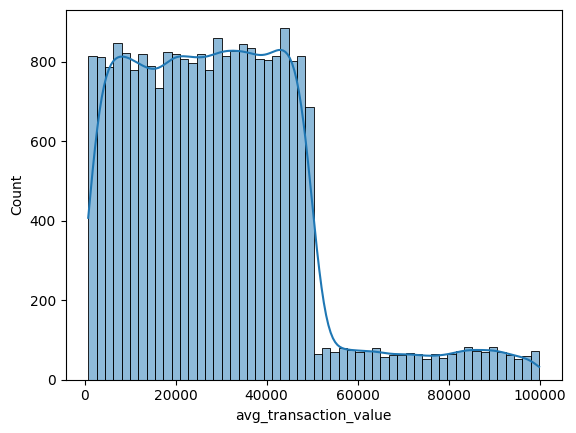

In [27]:
sns.histplot(X_train_penting['avg_transaction_value'],kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e5184891f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e518489730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e518477f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1e518489c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e518489f10>],
 'means': []}

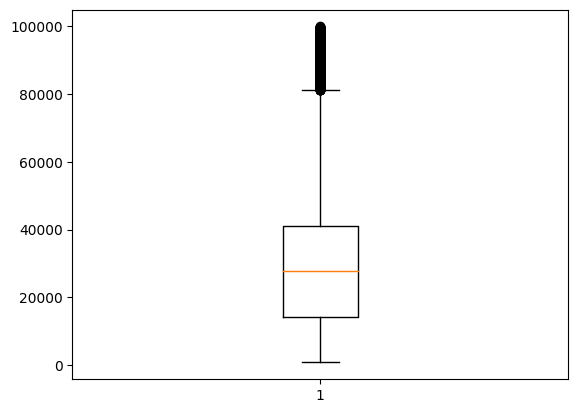

In [28]:
plt.boxplot(X_train_penting['avg_transaction_value'])

<Axes: xlabel='avg_frequency_login_days', ylabel='Count'>

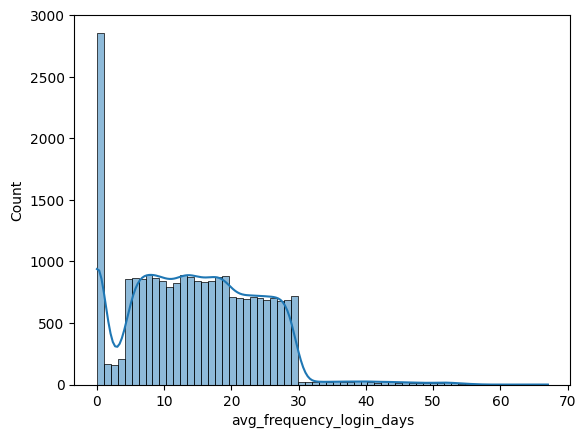

In [29]:
sns.histplot(X_train_penting['avg_frequency_login_days'],kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e51ab9a580>,
 'caps': [<matplotlib.lines.Line2D at 0x1e51ab9aac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e51ab9a2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e51aa26040>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e51aa262e0>],
 'means': []}

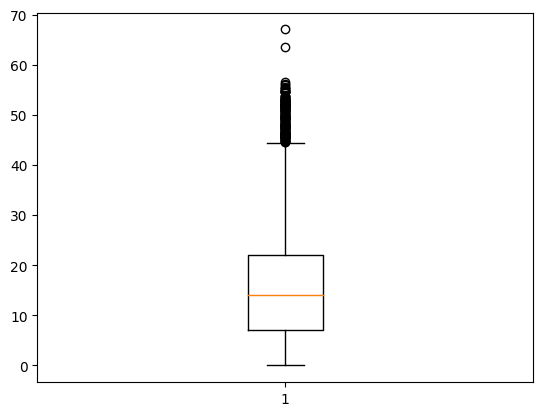

In [30]:
plt.boxplot(X_train_penting['avg_frequency_login_days'])

<Axes: xlabel='points_in_wallet', ylabel='Count'>

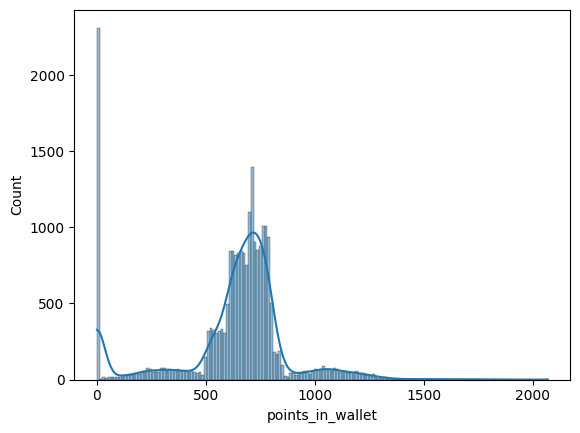

In [31]:
sns.histplot(X_train_penting['points_in_wallet'],kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e51ed8b880>,
 'caps': [<matplotlib.lines.Line2D at 0x1e51ed8bdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e51ed8b5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e51ec1c340>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e51ec1c5e0>],
 'means': []}

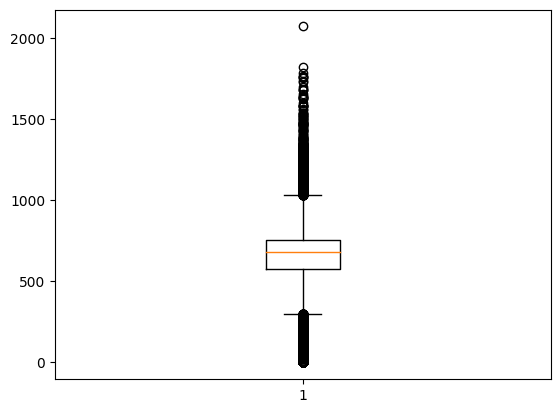

In [32]:
plt.boxplot(X_train_penting['points_in_wallet'])

berdasarkan hasil boxplot dan histplot dari ketiga kolom diatas dapat dilihat distribusi data nya tidak normal. berdasarkan histplot, dapat dilihat pada garis yang ada pada plot tidak berbentuk lonceng yang artinya ada outlier di ujung kiri atau kanan data, sedangkan pada boxplot dapat dilihat pada  titik-titik hitam yang berada diluar IQR nya

selanjutnya saya memisahkan kembali kolom categorical dan numerical dari data untuk dilakukan preprocessing yang berbeda berdasarkan tipe data nya

In [33]:
number = X_train_penting.select_dtypes(include=np.number).columns.tolist()
categorical = X_train_penting.select_dtypes(include=['object']).columns.tolist()

print(number)
print(categorical)

['avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
['membership_category', 'sentimen']


## Preprocessing Pipeline

```
pipeline ini berisikan tahap preprocessing dari kolom numerical dan categorical. Dimana pada kolom categorical saya melakukan encoding menggunakan ordinal encoder dikarenakan kolom categorical yang dimiliki bersifat ordinal / bertingkat

sedangkan pada kolom numerical saya melakukan handling outlier terlebih dahulu menggunakan winsorizer agar angka-angka extreme yang ada pada data diubah menjadi batas atas dan batas bawah yang telah saya setting lalu setelah itu saya melakukan scaling menggunakan minmaxscaler dikarenakan distribusi data pada kolom yang dimiliki tidak normal
```

In [34]:
membership_ordinal = {
    'No Membership': 0,
    'Basic Membership': 1,
    'Silver Membership': 2,
    'Gold Membership': 3,
    'Platinum Membership' : 4,
    'Premium Membership' : 5
}

sentimen_ordinal = {
    'negatif': 0,
    'netral': 1,
    'positif': 2
}

columns_to_encode = ['membership_category', 'sentimen']

preprocessor_categorical = ColumnTransformer(
    transformers=[
        ('ordinal_encode', OrdinalEncoder(categories=[list(membership_ordinal.keys()), list(sentimen_ordinal.keys())]),columns_to_encode)])

numeric_pipeline = make_pipeline(
    Winsorizer(capping_method='iqr', tail='both', fold=1.5),
    MinMaxScaler()
)


In [35]:
# Gabungkan fitur numerik dan fitur kategorikal
preprocessor = ColumnTransformer(transformers=[
    ('categorical', preprocessor_categorical, categorical),     # Menggabungkan proses pada preprocessing pada data numerical dan categorical menjadi 1 pipeline
    ('numeric', numeric_pipeline, number),
])
final_X_train = preprocessor.fit_transform(X_train_penting)
final_X_val = preprocessor.transform(X_val_penting)             # melakukan transformasi pada data melalui proses pipeline yang telah dibuat
final_X_test = preprocessor.transform(X_test_penting)

final_X_train

array([[5.        , 0.        , 0.0785778 , 0.        , 0.57743373],
       [1.        , 0.        , 0.41642914, 0.97015713, 0.39007872],
       [1.        , 0.        , 0.41282722, 0.40449438, 0.38792364],
       ...,
       [2.        , 0.        , 0.09788641, 0.51685393, 0.63976644],
       [4.        , 2.        , 0.45001125, 0.08988764, 0.68389761],
       [5.        , 2.        , 1.        , 0.38202247, 0.62978717]])

# Model Definition

## TensorFlow Pipeline

sebelum melakukan training pada model saya memasukkan data train dan validation kedalam sebuah pipeline dari tensorflow untuk mempersingkat waktu training model

In [36]:
train_pipe = tf.data.Dataset.from_tensor_slices((final_X_train,y_train)).batch(250).shuffle(100).repeat(2).prefetch(tf.data.AUTOTUNE)
val_pipe = tf.data.Dataset.from_tensor_slices((final_X_val,y_val)).batch(250)

## Model Sequential

In [106]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15, activation='relu',input_shape=(5,),kernel_initializer='GlorotNormal')) #input layer
model.add(tf.keras.layers.Dense(10, activation='relu')) #hidden layer
model.add(tf.keras.layers.Dense(5, activation='relu')) #hidden layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) #output layer
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(),metrics='accuracy')

history = model.fit(train_pipe, epochs=50, validation_data=val_pipe)

Epoch 1/50


190/190 [==============================] - 1s 2ms/step - loss: 0.6189 - accuracy: 0.6456 - val_loss: 0.5674 - val_accuracy: 0.8273
Epoch 2/50
190/190 [==============================] - 0s 1ms/step - loss: 0.5378 - accuracy: 0.8299 - val_loss: 0.5018 - val_accuracy: 0.8441
Epoch 3/50
190/190 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.8398 - val_loss: 0.4560 - val_accuracy: 0.8502
Epoch 4/50
190/190 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.8437 - val_loss: 0.4259 - val_accuracy: 0.8526
Epoch 5/50
190/190 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8450 - val_loss: 0.4050 - val_accuracy: 0.8516
Epoch 6/50
190/190 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8451 - val_loss: 0.3891 - val_accuracy: 0.8524
Epoch 7/50
190/190 [==============================] - 0s 1ms/step - loss: 0.3919 - accuracy: 0.8450 - val_loss: 0.3770 - val_accuracy: 0.8524
Epoch 8/50
190/19

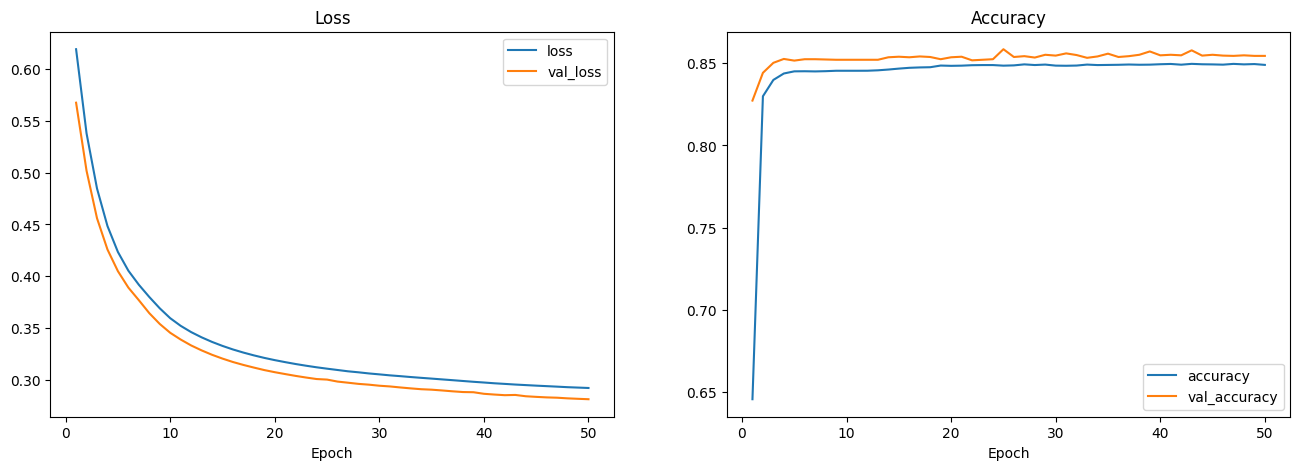

In [107]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

disini saya menggunakan 3 hidden layer dengan kernel initializer hanya pada hidden layer pertama menggunakan glorotnormal, sedangkan optimizer nya saya menggunakan SGD dengan metric accurary untuk training model nya. terlihat bahwa model sudah cukup convergence pada epoch ke 50 dengan akurasi train sebesar 84.90% dan akurasi validation nya 85.44%

## Model Functional

In [112]:
input_layer = Input(shape=(5,))
hidden_layer_1 = Dense(10, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal)(input_layer)
hidden_layer_2 = Dense(5, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal)(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal)(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='SGD',
                         metrics='accuracy')
history1 = model_functional.fit(train_pipe, epochs=50, validation_data=val_pipe)

Epoch 1/50


190/190 [==============================] - 1s 2ms/step - loss: 0.5537 - accuracy: 0.6887 - val_loss: 0.4737 - val_accuracy: 0.7918
Epoch 2/50
190/190 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.8309 - val_loss: 0.3862 - val_accuracy: 0.8465
Epoch 3/50
190/190 [==============================] - 0s 1ms/step - loss: 0.3691 - accuracy: 0.8422 - val_loss: 0.3421 - val_accuracy: 0.8468
Epoch 4/50
190/190 [==============================] - 0s 1ms/step - loss: 0.3424 - accuracy: 0.8411 - val_loss: 0.3240 - val_accuracy: 0.8489
Epoch 5/50
190/190 [==============================] - 0s 1ms/step - loss: 0.3310 - accuracy: 0.8410 - val_loss: 0.3152 - val_accuracy: 0.8506
Epoch 6/50
190/190 [==============================] - 0s 1ms/step - loss: 0.3253 - accuracy: 0.8418 - val_loss: 0.3101 - val_accuracy: 0.8509
Epoch 7/50
190/190 [==============================] - 0s 1ms/step - loss: 0.3219 - accuracy: 0.8423 - val_loss: 0.3069 - val_accuracy: 0.8509
Epoch 8/50
190/19

Text(0.5, 0, 'Epoch')

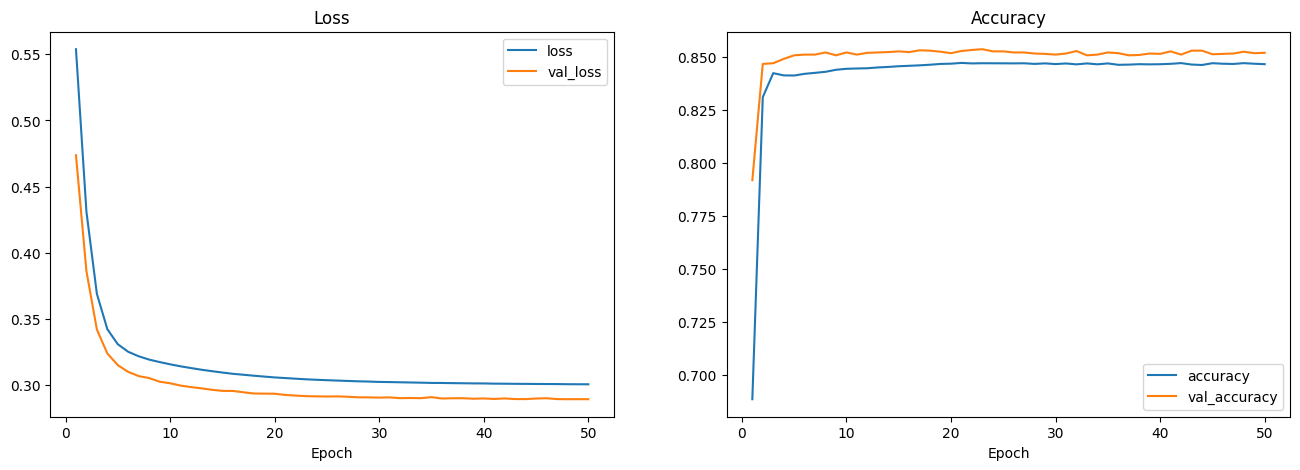

In [113]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history1.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history1.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history1.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history1.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

sedangkan pada model functional ini Keseluruhan arsitektur model nya ialah sebuah input layer berisikan 5 fitur, dua hidden layer, satu layer penggabung, dan satu layer output. selain layer penggabung dan input layer, semua layer yang ada mengguanakan initializer HeNormal dan pada output menggunakan GlorotNormal, untuk optimizer yang digunakan disini masih sama seperti sebelumnya yaitu SGD dengan metric accurary. model terlihat convergence pada epoch ke 20 dan pada epoch ke 50 accurary pada data train 84.64% sedangkan pada data validasi sebesar 85.17%

# Model Improvement

## Sequential

In [120]:
model_seq = tf.keras.models.Sequential()
model_seq.add(tf.keras.layers.Dense(15, activation='relu',input_shape=(5,),kernel_initializer='GlorotNormal')) #input layer
model_seq.add(tf.keras.layers.BatchNormalization())
model_seq.add(tf.keras.layers.Dropout(0.1))
model_seq.add(tf.keras.layers.Dense(10, activation='relu')) #hidden layer
model_seq.add(tf.keras.layers.Dense(5, activation='relu')) #hidden layer
model_seq.add(tf.keras.layers.Dense(1, activation='sigmoid')) #output layer

model_seq.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics='accuracy')

seq_hist_impove = model_seq.fit(train_pipe, epochs=50, validation_data=val_pipe)

Epoch 1/50
190/190 [==============================] - 2s 2ms/step - loss: 0.4439 - accuracy: 0.7845 - val_loss: 0.3295 - val_accuracy: 0.8536
Epoch 2/50
190/190 [==============================] - 0s 2ms/step - loss: 0.2957 - accuracy: 0.8528 - val_loss: 0.2823 - val_accuracy: 0.8501
Epoch 3/50
190/190 [==============================] - 0s 2ms/step - loss: 0.2804 - accuracy: 0.8514 - val_loss: 0.2603 - val_accuracy: 0.8490
Epoch 4/50
190/190 [==============================] - 0s 2ms/step - loss: 0.2705 - accuracy: 0.8508 - val_loss: 0.2498 - val_accuracy: 0.8484
Epoch 5/50
190/190 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.8533 - val_loss: 0.2455 - val_accuracy: 0.8590
Epoch 6/50
190/190 [==============================] - 0s 2ms/step - loss: 0.2619 - accuracy: 0.8633 - val_loss: 0.2421 - val_accuracy: 0.8678
Epoch 7/50
190/190 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.8757 - val_loss: 0.2384 - val_accuracy: 0.9007
Epoch 

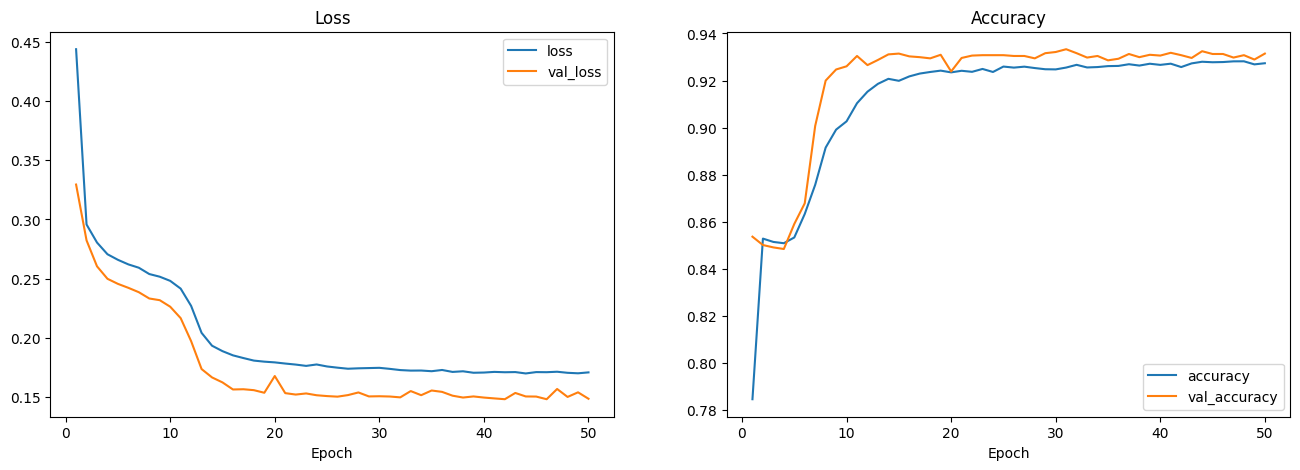

In [121]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),seq_hist_impove.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),seq_hist_impove.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),seq_hist_impove.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),seq_hist_impove.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

pada model sequential yang telah diimprove saya melakukan batchnormalization dan dropout pada hidden layer pertama, saya juga mengubah optimizer nya menjadi adam. dapat terlihat bahwa model sudah convergence pada epoch ke 20 dengan accurary yang meningkat yaitu pada epoch ke 50 pada data train 92.73% dan pada data validasi sebesar 93.14% .meskipun begitu model yang telah di improve ini tidak terlalu stabil ditandai dengan adanya spike pada accuracy dan loss nya

## Functional

In [137]:
input_layer = Input(shape=(5,))
hidden_layer_1 = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal)(input_layer)
hidden_layer_2 = Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal)(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal)(concat_layer)

model_func = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_func.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
func_hist_improv = model_func.fit(train_pipe, epochs=50, validation_data=val_pipe)

Epoch 1/50


190/190 [==============================] - 1s 2ms/step - loss: 0.4348 - accuracy: 0.7995 - val_loss: 0.3191 - val_accuracy: 0.8501
Epoch 2/50
190/190 [==============================] - 0s 1ms/step - loss: 0.3161 - accuracy: 0.8453 - val_loss: 0.2919 - val_accuracy: 0.8543
Epoch 3/50
190/190 [==============================] - 0s 1ms/step - loss: 0.2991 - accuracy: 0.8494 - val_loss: 0.2815 - val_accuracy: 0.8560
Epoch 4/50
190/190 [==============================] - 0s 1ms/step - loss: 0.2908 - accuracy: 0.8493 - val_loss: 0.2756 - val_accuracy: 0.8549
Epoch 5/50
190/190 [==============================] - 0s 1ms/step - loss: 0.2845 - accuracy: 0.8504 - val_loss: 0.2697 - val_accuracy: 0.8558
Epoch 6/50
190/190 [==============================] - 0s 1ms/step - loss: 0.2791 - accuracy: 0.8518 - val_loss: 0.2640 - val_accuracy: 0.8571
Epoch 7/50
190/190 [==============================] - 0s 1ms/step - loss: 0.2742 - accuracy: 0.8536 - val_loss: 0.2594 - val_accuracy: 0.8627
Epoch 8/50
190/19

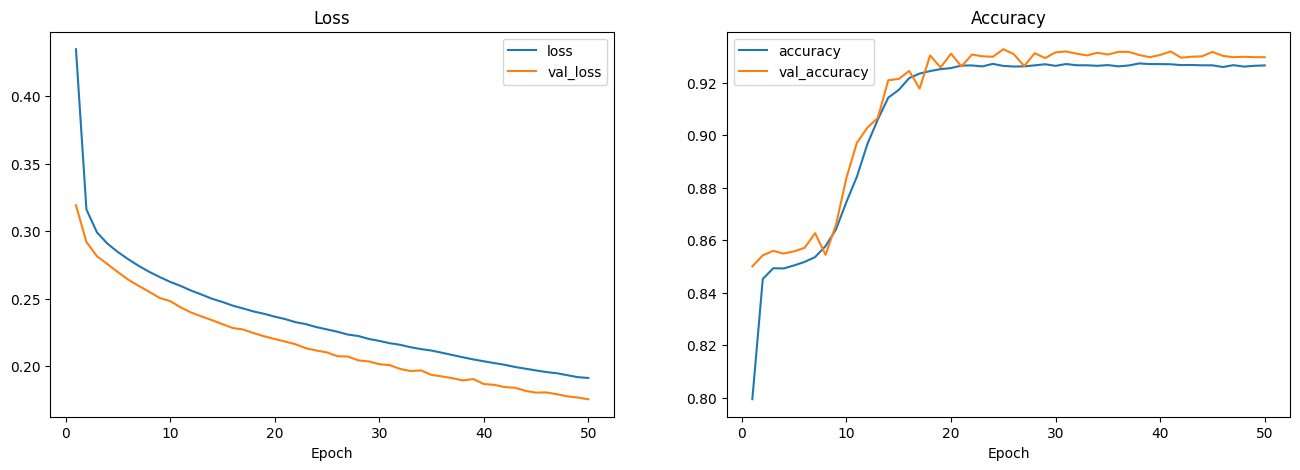

In [138]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),func_hist_improv.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),func_hist_improv.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),func_hist_improv.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),func_hist_improv.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

sedangkan pada model functional saya tidak mengubah arsitektur nya tetapi mengubah semua initializer nya menjadi glorotnormal dan optimizer nya menjadi adam. hasilnya pada epoch ke 50 model terlihat seperti masih bisa menurunkan loss nya tetapi pada metric accurary nya suda tidak banyak berubah, dimana pada data train yaitu sebesar 92.66% dan pada data validasi sebesar 92.98%

# Model Evaluation

In [140]:
seq_pred = model_seq.predict(final_X_test)
seq_pred = np.where(seq_pred >= 0.5, 1, 0)
func_pred = model_func.predict(final_X_test)
func_pred = np.where(func_pred >=0.5 , 1,0)

232/232 [==============================] - 0s 1ms/step


In [130]:
print(classification_report(seq_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3198
           1       0.96      0.91      0.93      4204

    accuracy                           0.93      7402
   macro avg       0.92      0.93      0.93      7402
weighted avg       0.93      0.93      0.93      7402



In [141]:
print(classification_report(func_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      3301
           1       0.94      0.92      0.93      4101

    accuracy                           0.92      7402
   macro avg       0.92      0.92      0.92      7402
weighted avg       0.92      0.92      0.92      7402



dari hasil evaluasi 2 model diatas terhadap data tes, model sequential sedikit lebih baik dibandingkan model functional ditandai dengan f1 score pada kelas 0 yang dimana lebih sedikit, model sequential lebih baik mengenali nya dengan recall 95% dan juga precision pada kelas 1 juga model lebih tinggi dibandingkan dengan model functional yang artinya model lebih baik dalam pemrediksian data pada kelas 1

# Model Saving

In [149]:
with open('prep_pipeline.pkl','wb') as file1:
    pickle.dump(preprocessor,file1)

In [150]:
model_seq.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_155 (Dense)           (None, 15)                90        
                                                                 
 batch_normalization_65 (Bat  (None, 15)               60        
 chNormalization)                                                
                                                                 
 dropout_65 (Dropout)        (None, 15)                0         
                                                                 
 dense_156 (Dense)           (None, 10)                160       
                                                                 
 dense_157 (Dense)           (None, 5)                 55        
                                                                 
 dense_158 (Dense)           (None, 1)                 6         
                                                     

In [151]:
model_seq.trainable=False

In [152]:
model_seq.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_155 (Dense)           (None, 15)                90        
                                                                 
 batch_normalization_65 (Bat  (None, 15)               60        
 chNormalization)                                                
                                                                 
 dropout_65 (Dropout)        (None, 15)                0         
                                                                 
 dense_156 (Dense)           (None, 10)                160       
                                                                 
 dense_157 (Dense)           (None, 5)                 55        
                                                                 
 dense_158 (Dense)           (None, 1)                 6         
                                                     

In [153]:
model_seq.save('churn_model.h5')

# Summary

```
Dari hasil prediksi churn, dapat disimpulkan bahwa meskipun sebagian besar pelanggan memiliki membership, masih ada sebagian pelanggan yang tidak mempunyai membership. Mayoritas feedback yang diterima perusahaan cenderung negatif, dan gender dari pelanggan tidak memiliki perbedaan signifikan. Selain itu, sebagian besar keluhan yang diterima oleh perusahaan tidak berstatus "not applicable." Hal ini menunjukkan pentingnya perusahaan untuk lebih fokus pada upaya memperbaiki pelayanan dan meningkatkan kualitas pengalaman pelanggan agar dapat mengurangi churn rate.

untuk model kedepannya mungkin bisa ditingkatkan lagi performa nya dengan penambahan / pengurangan layer, menambahkan / mengurangi batchnormalization yang ada, serta mencoba menggunakan optimizer lain yang ada dengan harapan performa dari model dapat meningkat
```

